## 1. Анализ набора данных о показателях оттока клиентов операторов связи

In [2]:
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2)

Мы продемонстрируем основные методы в действии, проанализировав набор данных о показателях оттока клиентов операторов связи. Давайте прочитаем данные (используя read_csv) и рассмотрим первые 5 строк, используя метод head:

In [3]:
df = pd.read_csv("D:/Учеба/pet-projects/EDA/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Давайте рассмотрим размерность данных, названия объектов и их типы.

In [4]:
print(df.shape)

(3333, 20)


Из выходных данных мы видим, что таблица содержит 3333 строки и 20 столбцов.

Теперь давайте попробуем вывести названия столбцов, используя `columns`:

In [5]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


Таким образом, названия столбцов: "Штат", "Продолжительность учетной записи",
"Код города", "Международный тарифный план",
"Тарифный план голосовой почты", "Количество сообщений голосовой почты",
"Общее количество минут за день",
"Общее количество звонков за день", "Общий расход за день", "Общее количество минут накануне",
"Общее количество звонки накануне", "Общая стоимость звонков накануне", "Общее количество ночных минут",
"Общее количество ночных звонков", "Общая стоимость ночных звонков", "Общее количество международных минут",
"Общее количество международных звонков", "Общая стоимость международных звонков", "Звонки в службу поддержки клиентов",
"Отток"

Мы можем использовать метод `info()` для вывода некоторой общей информации о фрейме данных:

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

`bool`, `int64`, `float64` и `object` - это типы данных для наших объектов. Мы видим, что один объект является логическим ("bool"), 3 объекта относятся к типу "object", а 16 объектов являются числовыми. С помощью этого же метода мы можем легко увидеть, есть ли какие-либо пропущенные значения. Здесь их нет, потому что каждый столбец содержит 3333 наблюдения, то есть столько же строк, сколько мы видели ранее в `shape`.

Мы можем ** изменить тип столбца** с помощью метода "astype". Давайте применим этот метод к столбцу "Отток", чтобы преобразовать его в `int64`:

In [7]:
df["Churn"] = df["Churn"].astype("int64")

Метод `describe` показывает основные статистические характеристики каждого числового признака (типы "int64" и "float64"): количество не пропущенных значений, среднее значение, стандартное отклонение, размах(разница между максимальным и минимальным значениями в наборе данных), медиана, квартили 0,25 и 0,75.

In [8]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


Чтобы просмотреть статистику по нечисловым признакам, необходимо явно указать интересующие нас типы данных в параметре `include`.

In [9]:
df.describe(include=["object"])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


Для категориальных (тип `object`) и логических (тип `bool`) признаков мы можем использовать метод `value_counts`. Давайте посмотрим на распределение `Оттока`:

In [10]:
df["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

2850 пользователей из 3333 являются постоянными; их показатель "Отток" равен "0". Чтобы рассчитать доли, нужно передать `normalize=True` функции `value_counts`.

In [11]:
df["Churn"].value_counts(normalize=True)

Churn
0    0.86
1    0.14
Name: proportion, dtype: float64


### Сортировка

Датафрейм может быть отсортирован по значению одного из признаков (т.е. столбцов). Например, мы можем выполнить сортировку по *Общему расходу за день* (используем `ascending=False` для сортировки в порядке убывания):


In [12]:
df.sort_values(by="Total day charge", ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


Мы также можем выполнять сортировку по нескольким столбцам:

In [13]:
df.sort_values(by=["Churn", "Total day charge"], ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


### Индексация и извлечение данных

Датафрейм может быть проиндексирован несколькими различными способами. 

Чтобы получить один столбец, мы можем использовать конструкцию `DataFrame['Name']`. Воспользуемся этим, чтобы ответить на вопрос, касающийся только этого столбца: **Какой отток пользователей в нашем датафрейме?**

In [14]:
df["Churn"].mean()

np.float64(0.14491449144914492)

14,5% - это на самом деле довольно плохо для компании; такой уровень оттока может привести к банкротству.


Давайте воспользуемся логической индексацией, чтобы ответить на вопросы:

**Сколько времени (в среднем) ушедшие пользователи тратят на телефон в течение дня?**


In [15]:
df[df["Churn"] == 1]["Total day minutes"].mean()

np.float64(206.91407867494823)


**Какая максимальная продолжительность международных звонков среди постоянных пользователей (`Churn == 0`), у которых нет международного тарифного плана?**



In [16]:
df[(df["Churn"] == 0) & (df["International plan"] == "No")]["Total intl minutes"].max()

np.float64(18.9)

Датафреймы можно индексировать по названию столбца (label), названию строки (index) или по порядковому номеру строки. Метод `loc` используется для **индексации по названию**, а `iloc()` — для **индексации по номеру**.

В первом случае ниже мы говорим: *"предоставьте нам значения строк с индексами от 0 до 5 (включительно) и столбцов с индексами от штата до кода города (включительно)"*. Во втором случае мы говорим: *"предоставьте нам значения первых пяти строк в первых трёх столбцах"* (как в типичном срезе Python: максимальное значение не включается).

In [17]:
df.loc[0:5, "State":"Area code"]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [18]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


Если нам нужно вывести первую или послденюю строку датафрейма, мы можем использовать конструкцию `df[:1]` или `df[-1:]` соответственно.

In [19]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0



### Применение функций к ячейкам, столбцам и строкам

**Чтобы применить функции ко всем столбцам, используем `apply()`:**


In [20]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

Метод `apply` также может быть использован для применения функций ко всем строкам. Для этого нужно  `axis=1`. Лямбда-функции очень удобны в таких ситуациях. Например, если нам нужно выбрать все штаты, начинающиеся с W, это можно сделать так:

In [21]:
df[df["State"].apply(lambda state: state[0] == "W")].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


Метод `map` может быть использован для **замены значения в столбце**, для этого нужно передать в качестве аргумента словарь вида `{old_value: new_value}`:

In [22]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


То же самое можно сделать с помощью метода `replace`: 

In [23]:
df = df.replace({"Voice mail plan": d})
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13044\1212166602.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Voice mail plan": d})


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0



### Группировка

В общем случае группировка данных в Pandas работает следующим образом:



```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. Метод `groupby` делит `grouping_columns` по их значениям. Они становятся новым индексом в результирующем датафрейме.
2. Затем выбираются интересующие столбцы (`columns_to_show`). Если `columns_to_show` не указан, будут включены все предложения, не относящиеся к groupby.
3. Наконец, к полученным группам для каждого выбранного столбца применяется одна или несколько функций.

Сгруппируем данные в соответствии со значениями переменной `Отток` и отобразим статистику по трём столбцам в каждой группе:

In [24]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

Сделаем то же самое, но немного по-другому, передав список функций в `agg()`:

In [25]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13044\2409454345.py:3: FutureWarning: The provided callable <function mean at 0x0000022C7E158EA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13044\2409454345.py:3: FutureWarning: The provided callable <function std at 0x0000022C7E158FE0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13044\2409454345.py:3: FutureWarning: The provided callable <function min at 0x0000022C7E1585E0> is currently using SeriesGroupBy.min. In a future version of pandas, the prov

Total day minutes                    Total eve minutes               \
                   mean    std  min    max              mean    std   min   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
         max                mean    std   min    max  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9


### Сводные таблицы

Предположим, мы хотим увидеть, как наблюдения в нашей выборке распределены в контексте двух переменных — `Отток` и `Международный план`. Для этого мы можем построить **таблицу сопряжённости**, используя метод `crosstab`:

In [26]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [27]:
pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.60,0.25
1,0.12,0.02


Видно, что большинство пользователей постоянны и не пользуются дополнительными услугами (международный тариф/голосовая почта).

Тем, кто знаком с Excel, это напомнит **сводные таблицы**. И, конечно же, сводные таблицы реализованы в Pandas: метод `pivot_table` принимает следующие параметры:

* `values` – список переменных для расчёта статистики,
* `index` – список переменных для группировки данных,
* `aggfunc` – какую статистику нужно рассчитать для групп, например, сумму, среднее, максимум, минимум или что-то ещё.

Посмотрим на среднее количество дневных, вечерних и ночных звонков по кодам городов:

In [28]:
df.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean",
)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60



### Преобразования DataFrame

Как и многое другое в Pandas, добавление столбцов в DataFrame можно реализовать разными способами.

Например, если мы хотим подсчитать общее количество вызовов для всех пользователей, давайте создадим столбец `total_calls` и вставим его в DataFrame:


In [29]:
total_calls = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)
df.insert(loc=len(df.columns), column="Total calls", value=total_calls)
# параметр loc — это количество столбцов, после которых следует вставить объект Series,
# мы устанавливаем его в len(df.columns), чтобы вставить его в самый конец датафрейма
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


Можно проще добавить столбец, не создавая промежуточный экземпляр Series:

In [30]:
df["Total charge"] = (
    df["Total day charge"]
    + df["Total eve charge"]
    + df["Total night charge"]
    + df["Total intl charge"]
)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


Чтобы удалить столбцы или строки, используем метод `drop`, передав необходимые индексы и параметр `axis` (`1` при удалении столбцов, и ничего или `0` при удалении строк). Аргумент `inplace` указывает, следует ли изменять исходный DataFrame. При `inplace=False` метод `drop` не изменяет существующий DataFrame и возвращает новый с удалёнными строками или столбцами. При `inplace=True` он изменяет DataFrame.

In [31]:
# избавиться от только что созданных столбцов
df.drop(["Total charge", "Total calls"], axis=1, inplace=True)
# и вот как можно удалить строки
df.drop([1, 2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## 2. Первая попытка прогнозирования оттока клиентов в сфере телекоммуникаций


Давайте посмотрим, как показатель оттока связан с функцией *Международный тариф*. Мы сделаем это с помощью таблицы сопряженности `crosstab`, а также с помощью визуального анализа с помощью `Seaborn`.

In [32]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Графика в формате Retina более четкая и разборчивая
%config InlineBackend.figure_format = 'retina'

<Axes: xlabel='International plan', ylabel='count'>

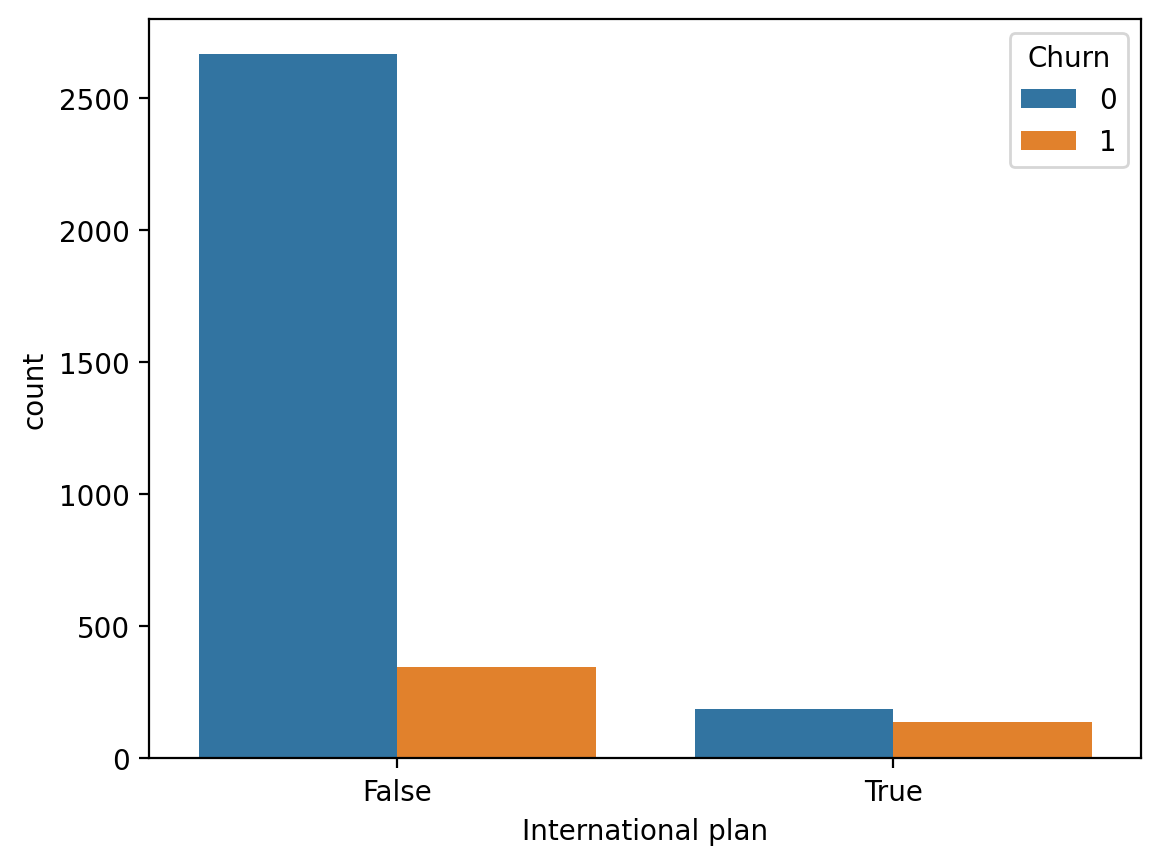

In [34]:
sns.countplot(x="International plan", hue="Churn", data=df)

Мы видим, что при тарифе «Международный план» отток клиентов значительно выше, что является интересным наблюдением! Возможно, большие и плохо контролируемые расходы на международные звонки очень подвержены конфликтам и приводят к недовольству клиентов оператора связи.

Далее рассмотрим ещё одну важную функцию — «Звонки в службу поддержки». Также составим сводную таблицу и изобразим график.

In [35]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


<Axes: xlabel='Customer service calls', ylabel='count'>

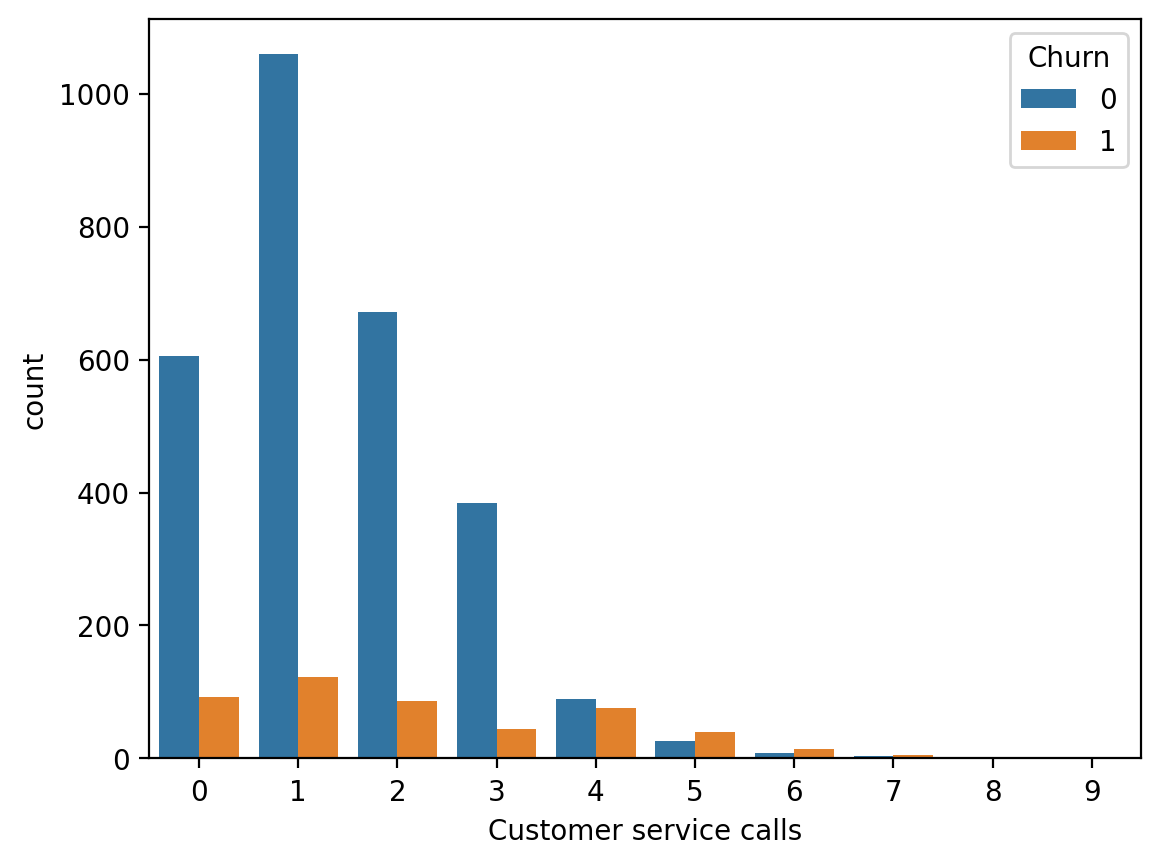

In [36]:
sns.countplot(x="Customer service calls", hue="Churn", data=df)

Хотя это не так очевидно из сводной таблицы, на представленном выше графике легко увидеть, что показатель оттока резко возрастает при 4 и более обращений в службу поддержки.

Теперь добавим в наш DataFrame двоичный признак – `Customer service calls > 3`. И ещё раз посмотрим, как он соотносится с оттоком.

In [37]:
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


<Axes: xlabel='Many_service_calls', ylabel='count'>

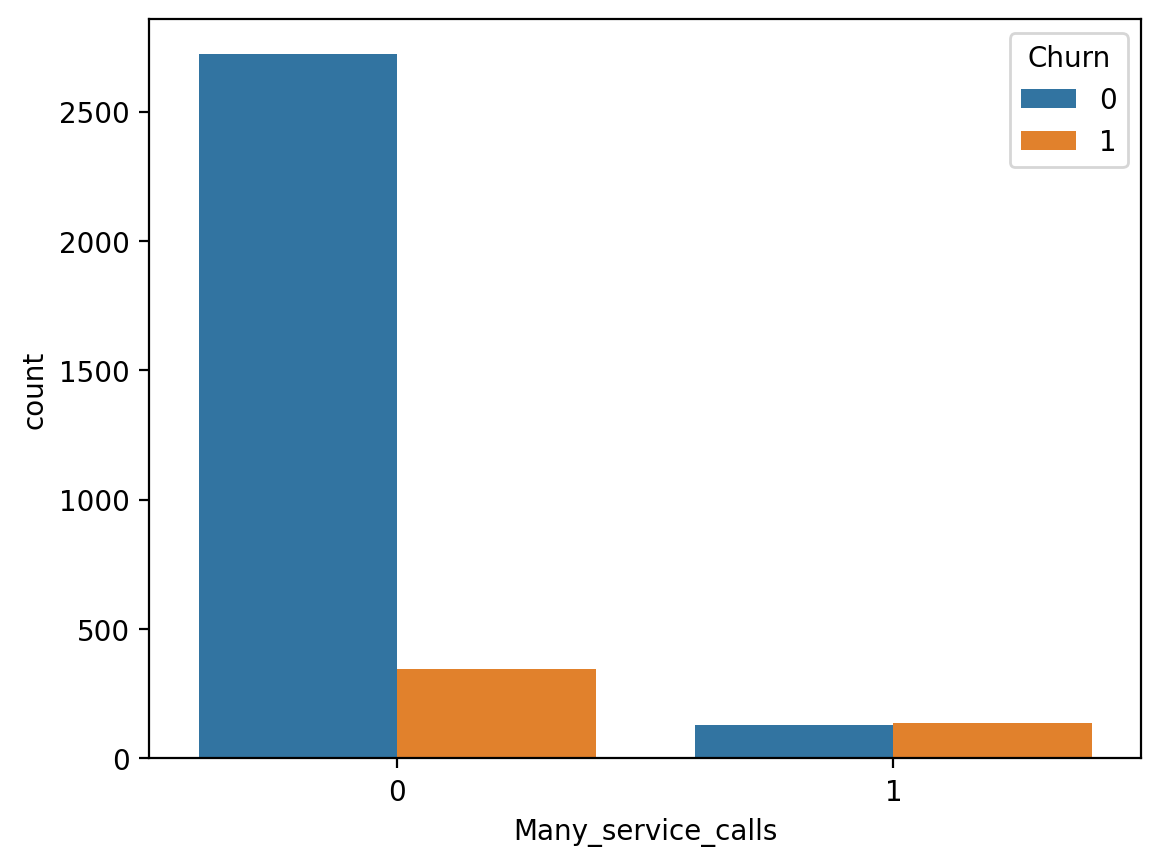

In [38]:
sns.countplot(x="Many_service_calls", hue="Churn", data=df)

Построим еще одну таблицу непредвиденных обстоятельств, которая связывает *Отток* как с *Международным планом*, так и с недавно созданными *Многими_вызовами_услуг*.

In [39]:
pd.crosstab(df["Many_service_calls"] & df["International plan"], df["Churn"])

Churn,0,1
row_0,,
False,2841,464
True,9,19


Таким образом, прогнозируя нелояльность клиента (*Отток*=1) при количестве обращений в сервисный центр больше 3 и добавлении *Международного плана* (и прогнозируя *Отток*=0 в противном случае), мы можем ожидать точности 85,8% (мы ошиблись всего 464 + 9 раз). Полученное нами в результате таких простых рассуждений значение 85,8% служит хорошей отправной точкой (*базовым уровнем*) для построения дальнейших моделей машинного обучения.